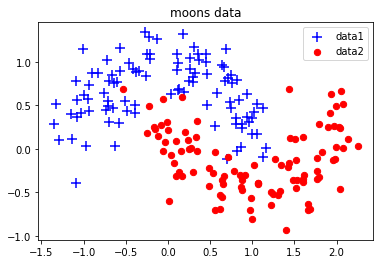

In [1]:
import sklearn.datasets     #引入数据集
import torch
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)           #设置随机数种子
X, Y = sklearn.datasets.make_moons(200,noise=0.2) #生成2组半圆形数据

arg = np.squeeze(np.argwhere(Y==0),axis = 1)     #获取第1组数据索引
arg2 = np.squeeze(np.argwhere(Y==1),axis = 1)#获取第2组数据索引

plt.title("moons data")
plt.scatter(X[arg,0], X[arg,1], s=100,c='b',marker='+',label='data1')
plt.scatter(X[arg2,0], X[arg2,1],s=40, c='r',marker='o',label='data2')
plt.legend()
plt.show()

In [2]:
def predict(model,x):   #封装支持Numpy的预测接口
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

def plot_decision_boundary(pred_func,X,Y):#在直角坐标系中可视化模型能力
    #计算取值范围
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    #在坐标系中采用数据，生成网格矩阵，用于输入模型
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #将数据输入并进行预测
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #将预测的结果可视化
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title("Linear predict")
    arg = np.squeeze(np.argwhere(Y==0),axis = 1)
    arg2 = np.squeeze(np.argwhere(Y==1),axis = 1)
    plt.scatter(X[arg,0], X[arg,1], s=100,c='b',marker='+')
    plt.scatter(X[arg2,0], X[arg2,1],s=40, c='r',marker='o')
    plt.show()

In [3]:
import torch.nn as nn
class LogicNet(nn.Module):
    def __init__(self,inputdim,hiddendim,outputdim):#初始化网络结构
        super(LogicNet,self).__init__()
        self.Linear1 = nn.Linear(inputdim,hiddendim) #定义全连接层
        self.Linear2 = nn.Linear(hiddendim,outputdim)#定义全连接层
        self.criterion = nn.CrossEntropyLoss() #定义交叉熵函数

    def forward(self,x): #搭建用两层全连接组成的网络模型
        x = self.Linear1(x)#将输入数据传入第1层
        x = torch.tanh(x)#对第一层的结果进行非线性变换
        x = self.Linear2(x)#再将数据传入第2层
#        print("LogicNet")
        return x

    def predict(self,x):#实现LogicNet类的预测接口
        #调用自身网络模型，并对结果进行softmax处理,分别得出预测数据属于每一类的概率
        pred = torch.softmax(self.forward(x),dim=1)
        return torch.argmax(pred,dim=1)  #返回每组预测概率中最大的索引

    def getloss(self,x,y): #实现LogicNet类的损失值计算接口
        y_pred = self.forward(x)
        loss = self.criterion(y_pred,y)#计算损失值得交叉熵
        return loss

In [4]:
model = LogicNet(inputdim=2,hiddendim=3,outputdim=2)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
xt = torch.from_numpy(X).type(torch.FloatTensor)#将Numpy数据转化为张量
yt = torch.from_numpy(Y).type(torch.LongTensor)
epochs = 1000#定义迭代次数
losses = []#定义列表，用于接收每一步的损失值
for i in range(epochs):
    loss = model.getloss(xt,yt)
    losses.append(loss.item())
    optimizer.zero_grad()#清空之前的梯度
    loss.backward()#反向传播损失值
    optimizer.step()#更新参数

In [5]:
def moving_average(a, w=10):#定义函数计算移动平均损失值
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]
def plot_losses(losses):
    avgloss= moving_average(losses) #获得损失值的移动平均值
    plt.figure(1)
    plt.subplot(211)
    plt.plot(range(len(avgloss)), avgloss, 'b--')
    plt.xlabel('step number')
    plt.ylabel('Training loss')
    plt.title('step number vs. Training loss')
    plt.show()

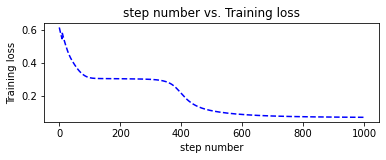

In [6]:
plot_losses(losses)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(xt), yt))

0.975


In [8]:
def predict(model,x):   #封装支持Numpy的预测接口
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

def plot_decision_boundary(pred_func,X,Y):#在直角坐标系中可视化模型能力
    #计算取值范围
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    #在坐标系中采用数据，生成网格矩阵，用于输入模型
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #将数据输入并进行预测
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #将预测的结果可视化
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.title("Linear predict")
    arg = np.squeeze(np.argwhere(Y==0),axis = 1)
    arg2 = np.squeeze(np.argwhere(Y==1),axis = 1)
    plt.scatter(X[arg,0], X[arg,1], s=100,c='b',marker='+')
    plt.scatter(X[arg2,0], X[arg2,1],s=40, c='r',marker='o')
    plt.show()

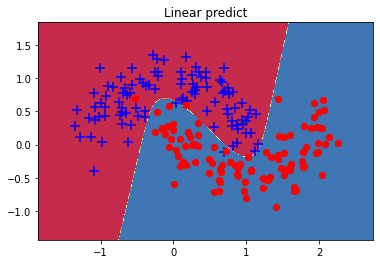

In [9]:
plot_decision_boundary(lambda x: predict(model, x), xt.numpy(), yt.numpy())